# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observations
1. There is a normal probability distribution between latitude and temperature, resulting in the bell curve seen in the graph. This is because as lat reaches 0, you are approching the equator and the temperature will be much higer there than at the ends of each pole (represented by the two ends of the graph)
2. There is a higher precent chance of cloudiness as the latitiude approaches 0. While the graph seems uncorrelated, there are much less occurances of 0% and much more occurances of 100% cloudiness.
3. General wind speeds across the globe average below 15mph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date as todaydate

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
unit = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={unit}&q="
# print(url)
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitutde = []
country = []
date = []
city_list = []
count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = (requests.get(url + city)).json()
    try:
        city_list.append(response["name"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        longitutde.append(response["coord"]["lon"])
        latitude.append(response["coord"]["lat"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"City found. Processing Record {count} | {city}")
        count = count + 1
    except:
        print("City not found. Skipping...")
        count = count + 1
        pass
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
City found. Processing Record 1 | busselton
City found. Processing Record 2 | vaini
City found. Processing Record 3 | clyde river
City found. Processing Record 4 | hithadhoo
City not found. Skipping...
City found. Processing Record 6 | ancud
City found. Processing Record 7 | bredasdorp
City found. Processing Record 8 | cape town
City found. Processing Record 9 | iqaluit
City not found. Skipping...
City found. Processing Record 11 | chernyshevskiy
City found. Processing Record 12 | kodiak
City found. Processing Record 13 | kokoda
City found. Processing Record 14 | havelock
City found. Processing Record 15 | rikitea
City not found. Skipping...
City not found. Skipping...
City found. Processing Record 18 | gumdag
City found. Processing Record 19 | new norfolk
City found. Processing Record 20 | paamiut
City found. Processing Record 21 | ushuaia
City found. Processing Record 22 | verkhnevilyuysk
City found. Processing Record 23 | bluff


City found. Processing Record 189 | flin flon
City found. Processing Record 190 | comodoro rivadavia
City found. Processing Record 191 | kalmunai
City found. Processing Record 192 | egvekinot
City found. Processing Record 193 | srednekolymsk
City found. Processing Record 194 | cap-aux-meules
City found. Processing Record 195 | fortuna
City found. Processing Record 196 | colac
City found. Processing Record 197 | seymchan
City found. Processing Record 198 | luderitz
City found. Processing Record 199 | narwar
City found. Processing Record 200 | honiara
City found. Processing Record 201 | faanui
City found. Processing Record 202 | cabo san lucas
City found. Processing Record 203 | port lincoln
City found. Processing Record 204 | vestmannaeyjar
City found. Processing Record 205 | kismayo
City found. Processing Record 206 | sitka
City found. Processing Record 207 | galle
City found. Processing Record 208 | butembo
City found. Processing Record 209 | kotka
City found. Processing Record 210 | 

City found. Processing Record 376 | nouadhibou
City found. Processing Record 377 | zinder
City found. Processing Record 378 | umm kaddadah
City found. Processing Record 379 | batagay-alyta
City not found. Skipping...
City found. Processing Record 381 | turukhansk
City found. Processing Record 382 | skibbereen
City found. Processing Record 383 | bozhou
City found. Processing Record 384 | hami
City found. Processing Record 385 | saravena
City not found. Skipping...
City not found. Skipping...
City found. Processing Record 388 | gilbues
City found. Processing Record 389 | padang
City found. Processing Record 390 | kajaani
City found. Processing Record 391 | ketrzyn
City found. Processing Record 392 | deputatskiy
City found. Processing Record 393 | tuatapere
City found. Processing Record 394 | kloulklubed
City found. Processing Record 395 | ekibastuz
City found. Processing Record 396 | arroyo
City found. Processing Record 397 | guerrero negro
City found. Processing Record 398 | qui nhon
Ci

City found. Processing Record 562 | jiwani
City found. Processing Record 563 | finschhafen
City found. Processing Record 564 | candolim
City not found. Skipping...
City found. Processing Record 566 | bonavista
City found. Processing Record 567 | kumeny
City found. Processing Record 568 | dickinson
City found. Processing Record 569 | mersing
City found. Processing Record 570 | looc
City found. Processing Record 571 | banda aceh
City not found. Skipping...
City found. Processing Record 573 | mastic beach
City not found. Skipping...
City found. Processing Record 575 | gambat
City found. Processing Record 576 | geraldton
City found. Processing Record 577 | gairo
City found. Processing Record 578 | lucapa
City found. Processing Record 579 | peniche
City found. Processing Record 580 | anadyr
City found. Processing Record 581 | lake city
City found. Processing Record 582 | leshukonskoye
City found. Processing Record 583 | weatherford
City found. Processing Record 584 | bani walid
City found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City": city_list,
                           "Lat": latitude,
                           "Lng": longitutde,
                           "Max Temp": temperature,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date
                          })

In [5]:
weather_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
weather_df.to_csv("../output_data/Weather.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,57.99,84,83,4.56,AU,1592534595
1,Vaini,-21.20,-175.20,73.40,88,75,10.29,TO,1592534615
2,Clyde River,70.47,-68.59,32.00,92,90,10.29,CA,1592534629
3,Hithadhoo,-0.60,73.08,84.65,73,74,3.38,MV,1592534598
4,Ancud,-41.87,-73.82,48.00,87,75,9.17,CL,1592534597
...,...,...,...,...,...,...,...,...,...
560,Hofn,64.25,-15.21,49.01,83,0,0.51,IS,1592534590
561,Tambura,5.60,27.47,67.21,98,100,4.68,SS,1592535086
562,Napanee,44.25,-76.95,71.60,64,75,5.82,CA,1592534885
563,Toora-Khem,52.47,96.11,65.34,51,20,7.45,RU,1592535086


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
high_humidity= weather_df.loc[weather_df["Humidity"] > 100]

In [8]:
#  Get the indices of cities that have humidity over 100%.
print(len(high_humidity))

0


In [9]:
clean_city_data = weather_df
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.798850,16.080584,67.419186,69.141593,48.315044,8.093841,1.592535e+09
std,33.678959,89.058873,13.634352,21.249559,38.424650,5.431253,2.081218e+02
min,-54.800000,-179.170000,28.940000,10.000000,0.000000,0.400000,1.592534e+09
25%,-8.930000,-64.920000,57.380000,58.000000,3.000000,3.910000,1.592535e+09
50%,24.800000,23.370000,69.800000,73.000000,50.000000,6.930000,1.592535e+09
75%,47.930000,88.530000,77.000000,86.000000,87.000000,11.390000,1.592535e+09
max,78.220000,179.320000,99.700000,100.000000,100.000000,33.330000,1.592535e+09


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame
weatherplotdata= clean_city_data[['City', 'Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

# Export the City_Data into a csv
weatherplotdata.to_csv("../output_data/ScatterPlottingData.csv")
weatherplotdata

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,-33.65,57.99,84,83,4.56
1,Vaini,-21.20,73.40,88,75,10.29
2,Clyde River,70.47,32.00,92,90,10.29
3,Hithadhoo,-0.60,84.65,73,74,3.38
4,Ancud,-41.87,48.00,87,75,9.17
...,...,...,...,...,...,...
560,Hofn,64.25,49.01,83,0,0.51
561,Tambura,5.60,67.21,98,100,4.68
562,Napanee,44.25,71.60,64,75,5.82
563,Toora-Khem,52.47,65.34,51,20,7.45


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

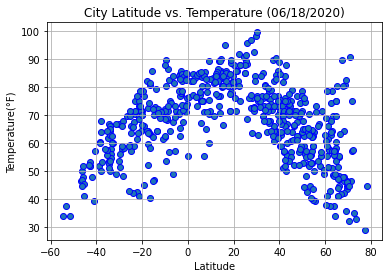

In [12]:
lat= weatherplotdata["Lat"]
temp= weatherplotdata["Max Temp"]
plt.scatter(lat, temp, edgecolors='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature(°F)')
currentdate = todaydate.today()
currentdatesyntax = currentdate.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Temperature ({currentdatesyntax})")
plt.savefig(f"../images/City Latitude vs. Temperature {currentdate}.png")
plt.show()

## Latitude vs. Humidity Plot

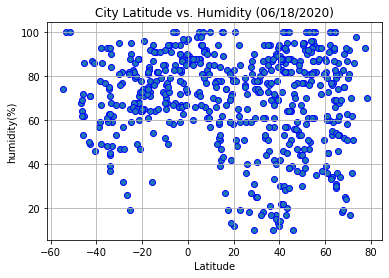

In [13]:
lat= weatherplotdata["Lat"]
humid= weatherplotdata["Humidity"]
plt.scatter(lat, humid, edgecolors='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('humidity(%)')
currentdate = todaydate.today()
currentdatesyntax = currentdate.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({currentdatesyntax})")
plt.savefig(f"../images/City Latitude vs. Humidity {currentdate}.png")
plt.show()

## Latitude vs. Cloudiness Plot

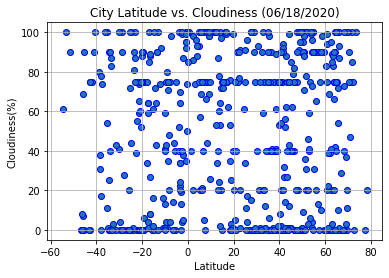

In [14]:
lat= weatherplotdata["Lat"]
cloud= weatherplotdata["Cloudiness"]
plt.scatter(lat, cloud, edgecolors='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
currentdate = todaydate.today()
currentdatesyntax = currentdate.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({currentdatesyntax})")
plt.savefig(f"../images/City Latitude vs. Cloudiness {currentdate}.png")
plt.show()

## Latitude vs. Wind Speed Plot

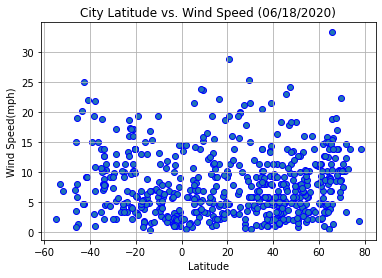

In [15]:
lat= weatherplotdata["Lat"]
wndspd= weatherplotdata["Wind Speed"]
plt.scatter(lat, wndspd, edgecolors='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
currentdate = todaydate.today()
currentdatesyntax = currentdate.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({currentdatesyntax})")
plt.savefig(f"../images/City Latitude vs. Wind Speed {currentdate}.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression